In [83]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [75]:
# Arrivals
ra = 3 # parcels/min
ta = 0.17 # min/parcel
# Processing
rp = 2.3 # parcels/min
tp = 0.33 # min/parcel

### Function to simulation solutions

In [76]:
# Solution 1 
def tq_s1(ra, ta, rp, tp, CVA, CVP):
    u = 1/2 * ra/rp
    tq = ((CVA**2+CVP**2)/2)*((math.pow(u, math.sqrt(6)-1)))/(2*(1-u))*tp
    return tq
# Solution 2
def tq_s2(ra, ta, rp, tp, CVA, CVP):
    u = 1/2 * ra/rp
    tq = ((CVA**2+CVP**2)/2)*((u)/(1-u))*tp
    return tq

### Scenario: Deterministic Arrival Distribution
CVA = 0 

In [60]:
# Deterministic Distribution for Arrival
CVA = 0
# Create list for result
x, y_1, y_2 = [], [], []
for p in np.linspace(0,3,3*10+1):
    CVP = p
    # CVP value
    x.append(CVP)
    # tq calculation
    y_1.append(tq_s1(ra, ta, rp, tp, CVA, CVP))
    y_2.append(tq_s2(ra, ta, rp, tp, CVA, CVP))
# Results
df_result = pd.DataFrame({'CVP': x, 'SOL1':y_1, 'SOL2':y_2})
df_result['Δ(2,1)'] = df_result['SOL2'] - df_result['SOL1']
df_result

,CVP,SOL1,SOL2,"Δ(2,1)"
0,0.0,0.000000,0.00,0.000000
1,0.1,0.012895,0.03,0.017105
2,0.2,0.051578,0.12,0.068422
3,0.3,0.116051,0.27,0.153949
4,0.4,0.206314,0.48,0.273686


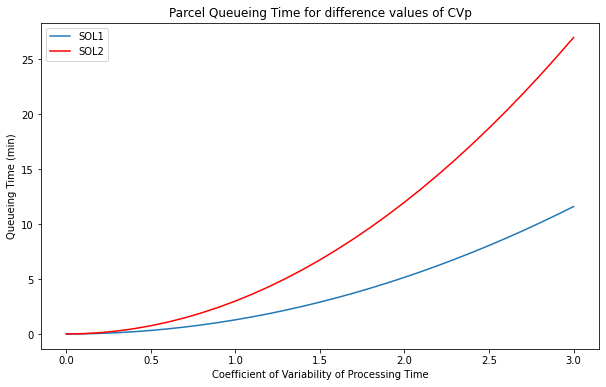

In [64]:
# Plot your results
ax = plt.gca()
df_result.plot(figsize=(10,6), x="CVP", y="SOL1", ax = ax)
df_result.plot(figsize=(10,6), x="CVP", y="SOL2", ax = ax, color='r')
plt.xlabel('Coefficient of Variability of Processing Time')
plt.ylabel('Queueing Time (min)')
plt.title('Parcel Queueing Time for difference values of CVp')
plt.show()